# FIFA 2022 - An ETL Project

## Team:
Isaac Perez
Michelle Risucci
Alex Reyes

## Background
There are currently a few proposed bids from multiple European and South American countries at this time but our FIFA Data Team would like to evaluate other potential host candidates who have not officially submitted bids. Our ETL project hopes to use the FIFA World Team Rankings and the World Happiness Reports from 2015-2019 to aid the 2022 FIFA World Cup bidding committee in evaluating potential host candidates: GDP per capita, Social Support, Perceptions of Corruption, International FIFA Rankings, and Overall citizen "Happiness" rank. 


## Objective
The 2022 FIFA World Cup Committee would ideally like to select a host country that has a strong supportive economy, a good ranked football team, and a good group of "Happy" football fans. Our group's project data aims to meet all those goals.

## Extract

Our team used two different datasets from <www.Kaggle.com>. These two dataset links are located below:

"FIFA World Ranking 1992-2020" https://www.kaggle.com/cashncarry/fifaworldranking

"World Happiness Report up to 2020" https://www.kaggle.com/mathurinache/world-happiness-report

## Transform

#### FIFA World Ranking 1992-2020 Data Cleaning:

* Dependencies: pandas / numpy / datetime
* Imported "data/fifa_ranking_2020_11_26.csv" from /data folder. 
* Extracted useful columns from original .csv. 
* Cleaned up data from 2015 to 2019 via the .loc method. 
* Identified unique countries and confederations. 
* Grouped international football teams by confederation via the groupby method.
* Developed a function to calculate the average FIFA World Ranking (2015-2019) by Confederation.
* Developed a function to calculate the average FIFA World Ranking (2015-2019) by Country.
* Converted new dataframe to "data/fifa_data_clean.csv" in the /data folder. 

In [1]:
# Dependencies

import pandas as pd
import numpy as np
import datetime as dt
import os
import glob
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

In [2]:
# Read in the csv using pandas

fifa_csv = "FIFA/data/fifa_ranking_2020_11_26.csv"
fifa_df = pd.read_csv(fifa_csv)
fifa_df.head()

,id,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date
0,43948,1,Germany,GER,57,0,0,UEFA,1992-12-31
1,43873,107,Mozambique,MOZ,9,0,0,CAF,1992-12-31
2,43816,108,Indonesia,IDN,9,0,0,AFC,1992-12-31
3,1882218,109,Antigua and Barbuda,ATG,8,0,0,CONCACAF,1992-12-31
4,43820,110,Jordan,JOR,8,0,0,AFC,1992-12-31


In [3]:
# Drop rows with any empty cells

fifa_df.dropna(
    axis=0,
    how='any',
    thresh=None,
    subset=None,
    inplace=True)
fifa_df.columns

Index(['id', 'rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'confederation', 'rank_date'],
      dtype='object')

In [4]:
# Extract the following columns: "id", "rank", "country_full", "confederation", "rank_date"

fifa_data_df = fifa_df[["id", "rank", "country_full", "confederation", "rank_date"]]
fifa_data_df.head()

,id,rank,country_full,confederation,rank_date
0,43948,1,Germany,UEFA,1992-12-31
1,43873,107,Mozambique,CAF,1992-12-31
2,43816,108,Indonesia,AFC,1992-12-31
3,1882218,109,Antigua and Barbuda,CONCACAF,1992-12-31
4,43820,110,Jordan,AFC,1992-12-31


In [5]:
# Clean up data from > 2015

fifa_data_clean2015 = fifa_data_df.loc[fifa_data_df["rank_date"] >= "2015-01-01", :]
fifa_data_clean2015

,id,rank,country_full,confederation,rank_date
48970,43961,67,Norway,UEFA,2015-01-08
48971,43910,75,Jamaica,CONCACAF,2015-01-08
48972,43908,73,Haiti,CONCACAF,2015-01-08
48973,43906,73,Guatemala,CONCACAF,2015-01-08
48974,43909,72,Honduras,CONCACAF,2015-01-08
...,...,...,...,...,...
62209,1930407,76,Curaçao,CONCACAF,2020-11-26
62210,43914,78,Panama,CONCACAF,2020-11-26
62211,43889,79,Uganda,CAF,2020-11-26
62212,43850,81,Cabo Verde,CAF,2020-11-26


In [6]:
# Clean up data from < 2019

fifa_data_clean = fifa_data_clean2015.loc[fifa_data_clean2015["rank_date"] <= "2019-12-31", :]
fifa_data_clean

,id,rank,country_full,confederation,rank_date
48970,43961,67,Norway,UEFA,2015-01-08
48971,43910,75,Jamaica,CONCACAF,2015-01-08
48972,43908,73,Haiti,CONCACAF,2015-01-08
48973,43906,73,Guatemala,CONCACAF,2015-01-08
48974,43909,72,Honduras,CONCACAF,2015-01-08
...,...,...,...,...,...
60739,43814,141,Hong Kong,AFC,2019-12-19
60740,43919,141,Suriname,CONCACAF,2019-12-19
60741,43980,141,Solomon Islands,OFC,2019-12-19
60742,43842,144,Yemen,AFC,2019-12-19


In [7]:
# Find FIFA unique countries on the list

country_count = len(fifa_data_clean["country_full"].unique())
print(f" The {country_count} is: ")

 The 211 is: 


In [8]:
# Fifa rank goes from 1-211 in some instances, verified in Excel

rank_count = len(fifa_data_clean["rank"].unique())
print(f" The {rank_count} is: ")

 The 211 is: 


In [9]:
# Number of confederations in Fifa World Rankings

confederation_count = len(fifa_data_clean["confederation"].unique())
print(f" The {confederation_count} is: ")

 The 6 is: 


In [10]:
# Count & Name of every country that's been listed into the database.

df_country_groupby = fifa_data_clean.groupby("country_full")
df_country_nunique = df_country_groupby["country_full"].nunique()
df_country_nunique

country_full
Afghanistan       1
Albania           1
Algeria           1
American Samoa    1
Andorra           1
                 ..
Vietnam           1
Wales             1
Yemen             1
Zambia            1
Zimbabwe          1
Name: country_full, Length: 211, dtype: int64

##### Confederations
* AFC - Asian Football Confederation 
* CAF - Confederation of African Football 
* CONCACAF - Confederation of North, Central America and Caribbean Association Football 
* CONMEBOL - South American Football Confederation 
* OFC - Oceania Football Confederation 
* UEFA - Union of European Football Associations

In [11]:
# Number of national teams in each confederation. 

df_confederation_groupby = fifa_data_clean.groupby("confederation")
df_confederation_groupby.nunique()

,id,rank,country_full,confederation,rank_date
confederation,,,,,
AFC,46,186,46,1,56
CAF,54,190,54,1,56
CONCACAF,35,200,35,1,56
CONMEBOL,10,88,10,1,56
OFC,11,89,11,1,56
UEFA,55,205,55,1,56


In [12]:
# Calculate the average FIFA World Ranking by Confederation

df_AFC_average_rank = fifa_data_clean[fifa_data_clean["confederation"] == "AFC"].mean()
print("AFC")
print(df_AFC_average_rank)
print("----------")

df_CAF_average_rank = fifa_data_clean[fifa_data_clean["confederation"] == "CAF"].mean()
print("CAF")
print(df_CAF_average_rank)
print("----------")

df_CONCACAF_average_rank = fifa_data_clean[fifa_data_clean["confederation"] == "CONCACAF"].mean()
print("CONCACAF")
print(df_CONCACAF_average_rank)
print("----------")

df_CONMEBOL_average_rank = fifa_data_clean[fifa_data_clean["confederation"] == "CONMEBOL"].mean()
print("CONMEBOL")
print(df_CONMEBOL_average_rank)
print("----------")

df_OFC_average_rank = fifa_data_clean[fifa_data_clean["confederation"] == "OFC"].mean()
print("OFC")
print(df_OFC_average_rank)
print("----------")

df_UEFA_average_rank = fifa_data_clean[fifa_data_clean["confederation"] == "UEFA"].mean()
print("UEFA")
print(df_UEFA_average_rank)
print("----------")

AFC
id      81921.760870
rank      131.996506
dtype: float64
----------
CAF
id      112328.796296
rank       106.419643
dtype: float64
----------
CONCACAF
id      200120.771429
rank       132.582653
dtype: float64
----------
CONMEBOL
id      43926.500000
rank       27.467857
dtype: float64
----------
OFC
id      207844.058824
rank       174.774510
dtype: float64
----------
UEFA
id      123117.298488
rank        64.958580
dtype: float64
----------


In [13]:
# Calculate the average FIFA World Ranking by Country

df_germany_average_rank = fifa_data_clean[fifa_data_clean["country_full"] == "Germany"].mean()
print("Germany")
print("df_germany_average_rank")
print("----------")

df_france_average_rank = fifa_data_clean[fifa_data_clean["country_full"] == "France"].mean()
print("France")
print("df_france_average_rank")
print("----------")

df_usa_average_rank = fifa_data_clean[fifa_data_clean["country_full"] == "USA"].mean()
print("USA")
print("df_usa_average_rank")
print("----------")

df_brazil_average_rank = fifa_data_clean[fifa_data_clean["country_full"] == "Brazil"].mean()
print("Brazil")
print("df_brazil_average_rank")
print("----------")

df_russia_average_rank = fifa_data_clean[fifa_data_clean["country_full"] == "Russia"].mean()
print("Russia")
print("df_russia_average_rank")
print("----------")


df_india_average_rank = fifa_data_clean[fifa_data_clean["country_full"] == "India"].mean()
print("india")
print("df_india_average_rank")
print("----------")



Germany
df_germany_average_rank
----------
France
df_france_average_rank
----------
USA
df_usa_average_rank
----------
Brazil
df_brazil_average_rank
----------
Russia
df_russia_average_rank
----------
india
df_india_average_rank
----------


In [14]:
# Convert to .csv file
#fifa_data_clean = fifa_data_clean.to_csv("data/fifa_data_clean.csv", index=True)

#### World Happiness Report 2015-2019 Data Cleaning:

* Dependencies: pandas / os / glob
* Imported five happy_year.csv files from Happiness/Resources folder.
* Extracted useful columns from the five original happy_year.csv files.
* Cleaned up the data in each file by reorganizing and renaming columns.
* Created a new dataframe with country and region to merge into three individual happy_year.csv files.
* Evaluated the files for null values. 
* Eliminated all null values. 
* Converted new clean dataframes for each year and region dataframe into one dataframe "Happiness/Happy_All_years.csv".

In [15]:
# Create loop to read in each csv file

path = 'Happiness/Resources'
filenames = glob.glob(path + "/*.csv")

d = {}

for filename in filenames:
    d[filename] = pd.read_csv(filename)
    print(filename)

Happiness/Resources/Happy_All_Years.csv
Happiness/Resources/2019.csv
Happiness/Resources/2018.csv
Happiness/Resources/2015.csv
Happiness/Resources/2016.csv
Happiness/Resources/2017.csv


##### 2015

In [16]:
# Save df to unique variable and create a new dataframe with select columns

df_2015 = d['Happiness/Resources/2015.csv']
new_df_2015 = df_2015[['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)', 
                       'Health (Life Expectancy)','Freedom', 'Trust (Government Corruption)', 'Generosity']].copy()
new_df_2015.rename(columns = {'Country': "country", 'Region': "region", 'Happiness Rank': "happiness rank", 
                             'Happiness Score': "happiness score", 'Economy (GDP per Capita)': "GDP",
                             'Health (Life Expectancy)': "health - life expectancy", 'Freedom':"freedom",
                             'Trust (Government Corruption)': "trust (govt corruption)", 'Generosity': "generosity"}, inplace=True)
new_df_2015.head()

,country,region,happiness rank,happiness score,GDP,health - life expectancy,freedom,trust (govt corruption),generosity
0,Switzerland,Western Europe,1,7.587,1.39651,0.94143,0.66557,0.41978,0.29678
1,Iceland,Western Europe,2,7.561,1.30232,0.94784,0.62877,0.14145,0.43630
2,Denmark,Western Europe,3,7.527,1.32548,0.87464,0.64938,0.48357,0.34139
3,Norway,Western Europe,4,7.522,1.45900,0.88521,0.66973,0.36503,0.34699
4,Canada,North America,5,7.427,1.32629,0.90563,0.63297,0.32957,0.45811


In [17]:
# Search for missing values

new_df_2015.isnull().values.any()

False

In [18]:
# Convert to .csv file

# new_df_2015.to_csv('happy_2015.csv', index=False)

##### 2016

In [19]:
# Save df to unique variable and create a new dataframe with select columns

df_2016 = d['Happiness/Resources/2016.csv']
new_df_2016 = df_2016[['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)', 
                       'Health (Life Expectancy)','Freedom', 'Trust (Government Corruption)', 'Generosity']].copy()
new_df_2016.rename(columns = {'Country': "country", 'Region': "region", 'Happiness Rank': "happiness rank", 
                             'Happiness Score': "happiness score", 'Economy (GDP per Capita)': "GDP",
                             'Health (Life Expectancy)': "health - life expectancy", 'Freedom':"freedom",
                             'Trust (Government Corruption)': "trust (govt corruption)", 'Generosity': "generosity"}, inplace=True)
new_df_2016.head()

,country,region,happiness rank,happiness score,GDP,health - life expectancy,freedom,trust (govt corruption),generosity
0,Denmark,Western Europe,1,7.526,1.44178,0.79504,0.57941,0.44453,0.36171
1,Switzerland,Western Europe,2,7.509,1.52733,0.86303,0.58557,0.41203,0.28083
2,Iceland,Western Europe,3,7.501,1.42666,0.86733,0.56624,0.14975,0.47678
3,Norway,Western Europe,4,7.498,1.57744,0.79579,0.59609,0.35776,0.37895
4,Finland,Western Europe,5,7.413,1.40598,0.81091,0.57104,0.41004,0.25492


In [20]:
# Search for missing values

new_df_2016.isnull().values.any()

False

In [21]:
# Convert to .csv file

# new_df_2016.to_csv('happy_2016.csv', index=False)

In [22]:
# Create country region dataframe and convert to .csv file

region_df = new_df_2016[['country', 'region']].copy()
region_df.sort_values(by=['country'], inplace=True)

# region_df.to_csv('happy_by_region', index=False)

region_df.head()

,country,region
153,Afghanistan,Southern Asia
108,Albania,Central and Eastern Europe
37,Algeria,Middle East and Northern Africa
140,Angola,Sub-Saharan Africa
25,Argentina,Latin America and Caribbean


##### 2017

In [23]:
# Save df to unique variable and create a new dataframe with select columns

df_2017 = d['Happiness/Resources/2017.csv']
df_17 = df_2017[['Country', 'Happiness.Rank', 'Happiness.Score', 'Economy..GDP.per.Capita.', 
                       'Health..Life.Expectancy.','Freedom', 'Trust..Government.Corruption.', 'Generosity']].copy()
df_17.rename(columns = {'Country': "country", 'Happiness.Rank': "happiness rank", 
                             'Happiness.Score': "happiness score", 'Economy..GDP.per.Capita.': "GDP",
                             'Health..Life.Expectancy.': "health - life expectancy", 'Freedom':"freedom",
                             'Trust..Government.Corruption.': "trust (govt corruption)", 'Generosity': "generosity"}, inplace=True)
df_17.head()

,country,happiness rank,happiness score,GDP,health - life expectancy,freedom,trust (govt corruption),generosity
0,Norway,1,7.537,1.616463,0.796667,0.635423,0.315964,0.362012
1,Denmark,2,7.522,1.482383,0.792566,0.626007,0.400770,0.355280
2,Iceland,3,7.504,1.480633,0.833552,0.627163,0.153527,0.475540
3,Switzerland,4,7.494,1.564980,0.858131,0.620071,0.367007,0.290549
4,Finland,5,7.469,1.443572,0.809158,0.617951,0.382612,0.245483


In [24]:
# Merge region_df on country for complete dataframe

merge_17 = df_17.merge(region_df, on='country')


# Create new dataframe and reindex columns

column_names = ('country', 'region', 'happiness rank', 'happiness score', 'GDP',
           'health - life expectancy', 'freedom', 'trust (govt corruption)',
           'generosity')
new_df_2017 = merge_17.reindex(columns=column_names)
new_df_2017.head()

,country,region,happiness rank,happiness score,GDP,health - life expectancy,freedom,trust (govt corruption),generosity
0,Norway,Western Europe,1,7.537,1.616463,0.796667,0.635423,0.315964,0.362012
1,Denmark,Western Europe,2,7.522,1.482383,0.792566,0.626007,0.400770,0.355280
2,Iceland,Western Europe,3,7.504,1.480633,0.833552,0.627163,0.153527,0.475540
3,Switzerland,Western Europe,4,7.494,1.564980,0.858131,0.620071,0.367007,0.290549
4,Finland,Western Europe,5,7.469,1.443572,0.809158,0.617951,0.382612,0.245483


In [25]:
# Search for missing values 

new_df_2017.isnull().values.any()

False

In [26]:
# Convert to .csv file

# new_df_2017.to_csv('happy_2017.csv', index=False)

##### 2018

In [27]:
# Save df to unique variable and create a new dataframe with select columns

df_2018 = d['Happiness/Resources/2018.csv']
df_18 = df_2018[['Country or region', 'Overall rank', 'Score', 'GDP per capita', 'Healthy life expectancy',
                      'Freedom to make life choices', 'Perceptions of corruption', 'Generosity']].copy()
df_18.rename(columns = {'Country or region': "country", 'Overall rank': "happiness rank", 
                             'Score': "happiness score", 'GDP per capita': "GDP",
                             'Healthy life expectancy': "health - life expectancy", 'Freedom to make life choices':"freedom",
                             'Perceptions of corruption': "trust (govt corruption)", 'Generosity': "generosity"}, inplace=True)
df_18

,country,happiness rank,happiness score,GDP,health - life expectancy,freedom,trust (govt corruption),generosity
0,Finland,1,7.632,1.305,0.874,0.681,0.393,0.202
1,Norway,2,7.594,1.456,0.861,0.686,0.340,0.286
2,Denmark,3,7.555,1.351,0.868,0.683,0.408,0.284
3,Iceland,4,7.495,1.343,0.914,0.677,0.138,0.353
4,Switzerland,5,7.487,1.420,0.927,0.660,0.357,0.256
...,...,...,...,...,...,...,...,...
151,Yemen,152,3.355,0.442,0.343,0.244,0.064,0.083
152,Tanzania,153,3.303,0.455,0.381,0.481,0.097,0.270
153,South Sudan,154,3.254,0.337,0.177,0.112,0.106,0.224
154,Central African Republic,155,3.083,0.024,0.010,0.305,0.038,0.218


In [28]:
# Merge region_df on country for complete dataframe

merge_18 = df_18.merge(region_df, on='country')


# Create new dataframe and reindex columns

column_names = ('country', 'region', 'happiness rank', 'happiness score', 'GDP',
           'health - life expectancy', 'freedom', 'trust (govt corruption)',
           'generosity')
new_df_2018 = merge_18.reindex(columns=column_names)
new_df_2018.head()

,country,region,happiness rank,happiness score,GDP,health - life expectancy,freedom,trust (govt corruption),generosity
0,Finland,Western Europe,1,7.632,1.305,0.874,0.681,0.393,0.202
1,Norway,Western Europe,2,7.594,1.456,0.861,0.686,0.340,0.286
2,Denmark,Western Europe,3,7.555,1.351,0.868,0.683,0.408,0.284
3,Iceland,Western Europe,4,7.495,1.343,0.914,0.677,0.138,0.353
4,Switzerland,Western Europe,5,7.487,1.420,0.927,0.660,0.357,0.256


In [29]:
# Search for missing values

new_df_2018.isnull().values.any()

True

In [30]:
# Look up and remove null values

nan_values= new_df_2018[new_df_2018.isna().any(axis=1)]
print(nan_values)

clean_df_2018 = new_df_2018.dropna()
clean_df_2018.head()

                 country                           region  happiness rank  \
19  United Arab Emirates  Middle East and Northern Africa              20   

    happiness score    GDP  health - life expectancy  freedom  \
19            6.774  2.096                      0.67    0.284   

    trust (govt corruption)  generosity  
19                      NaN       0.186  


,country,region,happiness rank,happiness score,GDP,health - life expectancy,freedom,trust (govt corruption),generosity
0,Finland,Western Europe,1,7.632,1.305,0.874,0.681,0.393,0.202
1,Norway,Western Europe,2,7.594,1.456,0.861,0.686,0.340,0.286
2,Denmark,Western Europe,3,7.555,1.351,0.868,0.683,0.408,0.284
3,Iceland,Western Europe,4,7.495,1.343,0.914,0.677,0.138,0.353
4,Switzerland,Western Europe,5,7.487,1.420,0.927,0.660,0.357,0.256


In [31]:
# Convert to .csv file

# clean_df_2018.to_csv('happy_2018.csv', index=False)

##### 2019

In [32]:
# Save df to unique variable and create a new dataframe with select columns

df_2019 = d['Happiness/Resources/2019.csv']
df_19 = df_2019[['Country or region', 'Overall rank', 'Score', 'GDP per capita', 'Healthy life expectancy',
                      'Freedom to make life choices', 'Perceptions of corruption', 'Generosity']].copy()
df_19.rename(columns = {'Country or region': "country", 'Overall rank': "happiness rank", 
                             'Score': "happiness score", 'GDP per capita': "GDP",
                             'Healthy life expectancy': "health - life expectancy", 'Freedom to make life choices':"freedom",
                             'Perceptions of corruption': "trust (govt corruption)", 'Generosity': "generosity"}, inplace=True)
df_19

,country,happiness rank,happiness score,GDP,health - life expectancy,freedom,trust (govt corruption),generosity
0,Finland,1,7.769,1.340,0.986,0.596,0.393,0.153
1,Denmark,2,7.600,1.383,0.996,0.592,0.410,0.252
2,Norway,3,7.554,1.488,1.028,0.603,0.341,0.271
3,Iceland,4,7.494,1.380,1.026,0.591,0.118,0.354
4,Netherlands,5,7.488,1.396,0.999,0.557,0.298,0.322
...,...,...,...,...,...,...,...,...
151,Rwanda,152,3.334,0.359,0.614,0.555,0.411,0.217
152,Tanzania,153,3.231,0.476,0.499,0.417,0.147,0.276
153,Afghanistan,154,3.203,0.350,0.361,0.000,0.025,0.158
154,Central African Republic,155,3.083,0.026,0.105,0.225,0.035,0.235


In [33]:
# Merge region_df on country for complete dataframe

merge_19 = df_19.merge(region_df, on='country')

# Create new dataframe and reindex columns

column_names = ('country', 'region', 'happiness rank', 'happiness score', 'GDP',
           'health - life expectancy', 'freedom', 'trust (govt corruption)',
           'generosity')
new_df_2019 = merge_19.reindex(columns=column_names)
new_df_2019

,country,region,happiness rank,happiness score,GDP,health - life expectancy,freedom,trust (govt corruption),generosity
0,Finland,Western Europe,1,7.769,1.340,0.986,0.596,0.393,0.153
1,Denmark,Western Europe,2,7.600,1.383,0.996,0.592,0.410,0.252
2,Norway,Western Europe,3,7.554,1.488,1.028,0.603,0.341,0.271
3,Iceland,Western Europe,4,7.494,1.380,1.026,0.591,0.118,0.354
4,Netherlands,Western Europe,5,7.488,1.396,0.999,0.557,0.298,0.322
...,...,...,...,...,...,...,...,...,...
143,Yemen,Middle East and Northern Africa,151,3.380,0.287,0.463,0.143,0.077,0.108
144,Rwanda,Sub-Saharan Africa,152,3.334,0.359,0.614,0.555,0.411,0.217
145,Tanzania,Sub-Saharan Africa,153,3.231,0.476,0.499,0.417,0.147,0.276
146,Afghanistan,Southern Asia,154,3.203,0.350,0.361,0.000,0.025,0.158


In [34]:
# Search for missing values

new_df_2019.isnull().values.any()

False

In [35]:
# Convert to .csv file
# new_df_2019.to_csv('happy_2019.csv', index=False)

## Load

After the raw data cleaning, we created three individual tables in PostgreSQL. The tables created are as follows:

"fifa" Base Table
    * Content Column_name [ id, rank, country_full, confederation, rank_date ] 

"happinessyear" Base Table
    * Content Column_name [ country, region, happinessrank, happinessscore, gdp, health, freedom, trust, generosity, happiessyear ]

"happinessregion" Base Table
    * Content Column_name [ country, region ]

In [36]:
# Connect to local database

engine = create_engine('postgresql://localhost:5432/etl')
conn = engine.connect()

In [37]:
# Check for tables

engine.table_names()

['happinessregion', 'happinessyear', 'fifa']

In [38]:
# View the table data for happinessyear
df_happinessyear_sql = pd.read_sql('SELECT * FROM happinessyear;', conn)
df_happinessyear_sql.head()

,country,region,happiness_rank,happiness_score,gdp,health,freedom,trust_govt_corruption,generosity,happiness_year
0,Afghanistan,Southern Asia,154,3.203,0.350000,0.361000,0.00000,0.025000,0.158000,2019
1,Afghanistan,Southern Asia,145,3.632,0.332000,0.255000,0.08500,0.036000,0.191000,2018
2,Afghanistan,Southern Asia,141,3.794,0.401477,0.180747,0.10618,0.061158,0.311871,2017
3,Afghanistan,Southern Asia,154,3.360,0.382270,0.173440,0.16430,0.071120,0.312680,2016
4,Afghanistan,Southern Asia,153,3.575,0.319820,0.303350,0.23414,0.097190,0.365100,2015


In [39]:
# View the table data for fifa

df_fifa_sql = pd.read_sql('SELECT * FROM fifa;', conn)
df_fifa_sql.head()

,id,rank,country_full,confederation,rank_date
0,20000,142,Afghanistan,AFC,1/8/15
1,20000,144,Afghanistan,AFC,2/12/15
2,20000,137,Afghanistan,AFC,3/12/15
3,20000,135,Afghanistan,AFC,4/9/15
4,20000,135,Afghanistan,AFC,5/7/15


In [40]:
# Rename country_full column for merge
df_fifa_sql.rename(columns = {'country_full': "country"}, inplace=True)
df_fifa_sql.head()

,id,rank,country,confederation,rank_date
0,20000,142,Afghanistan,AFC,1/8/15
1,20000,144,Afghanistan,AFC,2/12/15
2,20000,137,Afghanistan,AFC,3/12/15
3,20000,135,Afghanistan,AFC,4/9/15
4,20000,135,Afghanistan,AFC,5/7/15


In [41]:
# View the table data for happinessregion

df_region_sql = pd.read_sql('SELECT * FROM happinessregion;', conn)
df_region_sql

,country,region
0,Afghanistan,Southern Asia
1,Albania,Central and Eastern Europe
2,Algeria,Middle East and Northern Africa
3,American Samoa,None
4,Andorra,None
...,...,...
213,Vietnam,Southeastern Asia
214,Wales,None
215,Yemen,Middle East and Northern Africa
216,Zambia,Sub-Saharan Africa


In [42]:
# Merge two dataframes

df_merge_sql = pd.merge(df_fifa_sql, df_happinessyear_sql, on='country')
df_merge_sql.head()

,id,rank,country,confederation,rank_date,region,happiness_rank,happiness_score,gdp,health,freedom,trust_govt_corruption,generosity,happiness_year
0,20000,142,Afghanistan,AFC,1/8/15,Southern Asia,154,3.203,0.350000,0.361000,0.00000,0.025000,0.158000,2019
1,20000,142,Afghanistan,AFC,1/8/15,Southern Asia,145,3.632,0.332000,0.255000,0.08500,0.036000,0.191000,2018
2,20000,142,Afghanistan,AFC,1/8/15,Southern Asia,141,3.794,0.401477,0.180747,0.10618,0.061158,0.311871,2017
3,20000,142,Afghanistan,AFC,1/8/15,Southern Asia,154,3.360,0.382270,0.173440,0.16430,0.071120,0.312680,2016
4,20000,142,Afghanistan,AFC,1/8/15,Southern Asia,153,3.575,0.319820,0.303350,0.23414,0.097190,0.365100,2015


In [43]:
# Create a new dataframe of the top ranked countries from entire dataset

df_ranked_1 = df_merge_sql.loc[df_merge_sql['rank'] == 1]
df_ranked_1.head()

,id,rank,country,confederation,rank_date,region,happiness_rank,happiness_score,gdp,health,freedom,trust_govt_corruption,generosity,happiness_year
1094,43922,1,Argentina,CONMEBOL,7/9/15,Latin America and Caribbean,47,6.086,1.092000,0.881000,0.471000,0.05000,0.066000,2019
1095,43922,1,Argentina,CONMEBOL,7/9/15,Latin America and Caribbean,29,6.388,1.073000,0.744000,0.570000,0.05400,0.062000,2018
1096,43922,1,Argentina,CONMEBOL,7/9/15,Latin America and Caribbean,24,6.599,1.185296,0.695137,0.494519,0.05974,0.109457,2017
1097,43922,1,Argentina,CONMEBOL,7/9/15,Latin America and Caribbean,26,6.650,1.151370,0.697110,0.422840,0.07296,0.109890,2016
1098,43922,1,Argentina,CONMEBOL,7/9/15,Latin America and Caribbean,30,6.574,1.053510,0.787230,0.449740,0.08484,0.114510,2015


In [44]:
# Create a new dataframe with first rated countries and their happiness_rank

df_fifa1_happy_rank = df_ranked_1[['country', 'rank', 'rank_date', 'happiness_rank', 'gdp', 'happiness_year']].copy()
df_fifa1_happy_rank.sort_values(by='happiness_rank')

,country,rank,rank_date,happiness_rank,gdp,happiness_year
13743,Germany,1,3/15/18,15,1.340,2018
13748,Germany,1,4/12/18,15,1.340,2018
13578,Germany,1,6/4/15,15,1.340,2018
13573,Germany,1,5/7/15,15,1.340,2018
13738,Germany,1,2/15/18,15,1.340,2018
...,...,...,...,...,...,...
1169,Argentina,1,10/20/16,47,1.092,2019
1164,Argentina,1,9/15/16,47,1.092,2019
1154,Argentina,1,7/14/16,47,1.092,2019
1109,Argentina,1,10/1/15,47,1.092,2019


In [45]:
df_fh_grp_avg = df_fifa1_happy_rank.groupby(['country'])['happiness_rank', 'gdp'].mean()
df_fh_grp_avg.reset_index(inplace = True)

df_fh_grp_avg.sort_values(by='happiness_rank', inplace=True)
df_fh_grp_avg

/Users/MichMac/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,country,happiness_rank,gdp
1,Belgium,17.6,1.375398
4,Germany,18.0,1.395343
2,Brazil,23.0,1.033227
3,France,27.8,1.344117
0,Argentina,31.2,1.111035


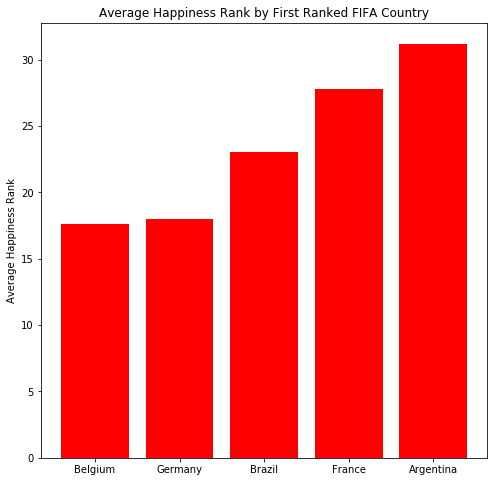

In [50]:
x1 = df_fh_grp_avg['country']
y1 = df_fh_grp_avg['happiness_rank']


fig2, ax2 = plt.subplots(figsize=(8,8))
ax2.bar(x1,y1, color='r')
ax2.set_ylabel("Average Happiness Rank")
ax2.set_title("Average Happiness Rank by First Ranked FIFA Country")

plt.savefig("Avg_Rank.png")
plt.show();

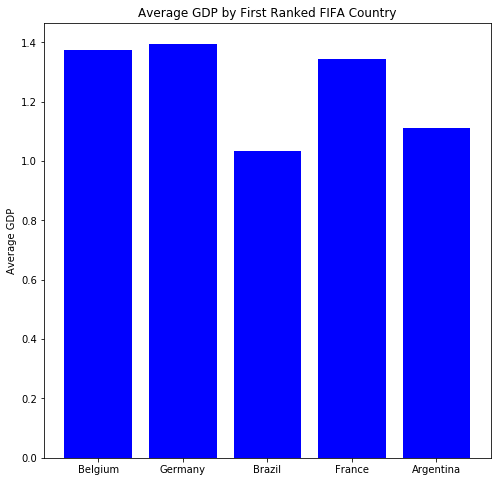

In [51]:
x2 = df_fh_grp_avg['country']
y2 = df_fh_grp_avg['gdp']


fig3, ax3 = plt.subplots(figsize=(8,8))
ax3.bar(x2,y2, color='b')
ax3.set_ylabel("Average GDP")
ax3.set_title("Average GDP by First Ranked FIFA Country")

plt.savefig("Avg_GDP.png")
plt.show();

In [48]:
fig = plt.figure()
# ax = fig.add_axes([df_fh_grp_avg['country']])
ax.bar(df_fh_grp_avg['country'], df_fh_grp_avg['happiness_rank'], color='r')
ax.bar(df_fh_grp_avg['country'], df_fh_grp_avg['gdp'], color='b')
plt.show();

                   

NameError: name 'ax' is not defined

<Figure size 432x288 with 0 Axes>

In [ ]:
fig1, ax1 = plt.subplots(figsize=(10,15))
ax.bar(df_fh_grp_avg['country'], df_fh_grp_avg['happiness_rank'])
plt.show();

In [ ]:
# Plot histogram
x = df_fifa1_happy_rank['country']
y = df_fifa1_happy_rank['happiness_rank']
plt.hist(x)

In [ ]:
x = df_fifa1_happy_rank['country']
y = df_fifa1_happy_rank['happiness_rank']

fig, ax = plt.subplots(figsize=(10,15))
ax.bar(x,y)
plt.show();